In [1]:
import numpy as np
from graspy.datasets import load_drosophila_right
from graspy.plot import heatmap
from graspy.utils import binarize, symmetrize
%matplotlib inline



In [1]:
#checking python Version
import platform
print(platform.python_version())

3.8.5


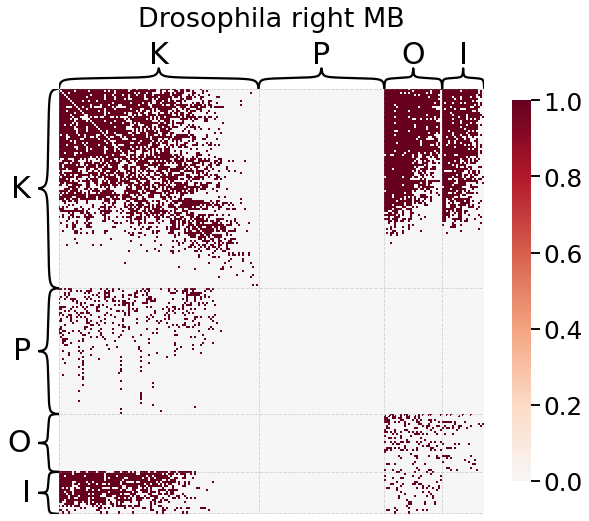

In [3]:
adj, labels = load_drosophila_right(return_labels=True)
adj = binarize(adj)
heatmap(adj,
        inner_hier_labels=labels,
        title='Drosophila right MB',
        font_scale=1.5,
        sort_nodes=True);

ER "p" parameter: 0.1661046088739007


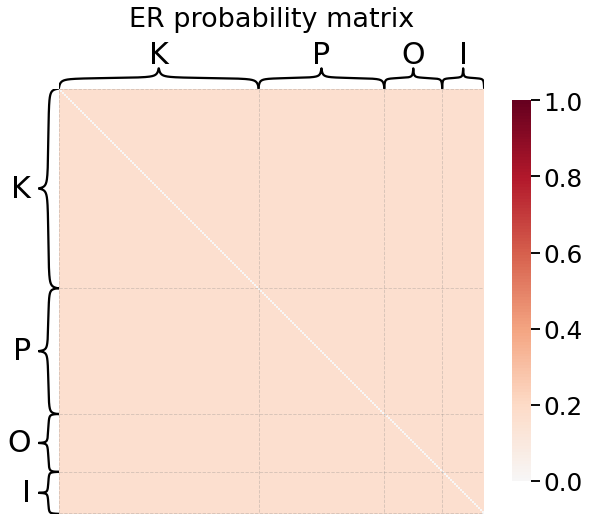

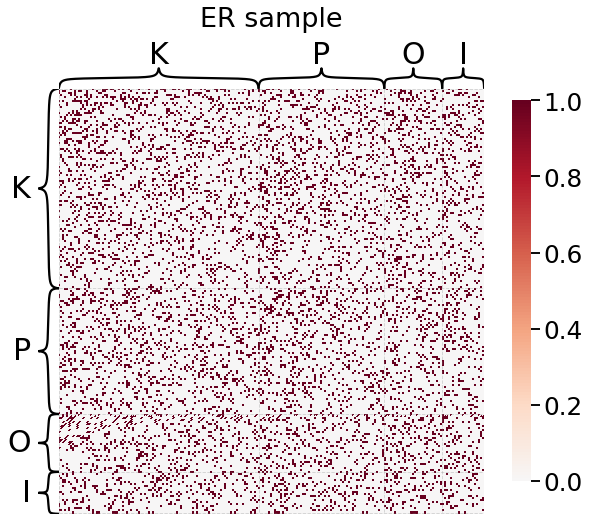

In [4]:
from graspy.models import EREstimator
er = EREstimator(directed=True,loops=False)
er.fit(adj)
print(f"ER \"p\" parameter: {er.p_}")
heatmap(er.p_mat_,
        inner_hier_labels=labels,
        font_scale=1.5,
        title="ER probability matrix",
        vmin=0, vmax=1,
        sort_nodes=True)
heatmap(er.sample()[0],
        inner_hier_labels=labels,
        font_scale=1.5,
        title="ER sample",
        sort_nodes=True);

DCER "p" parameter: 7536.0


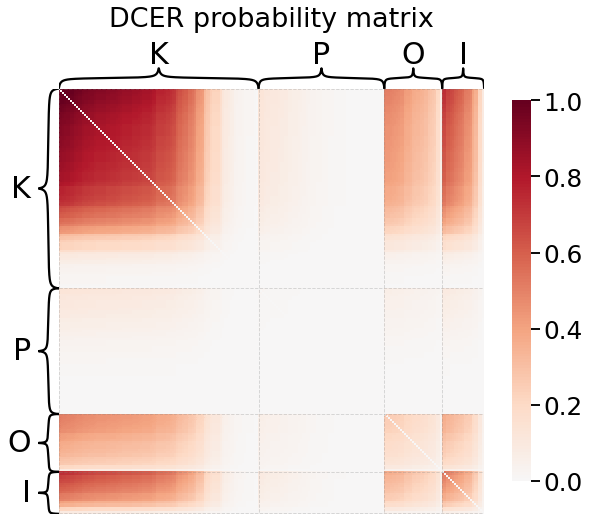

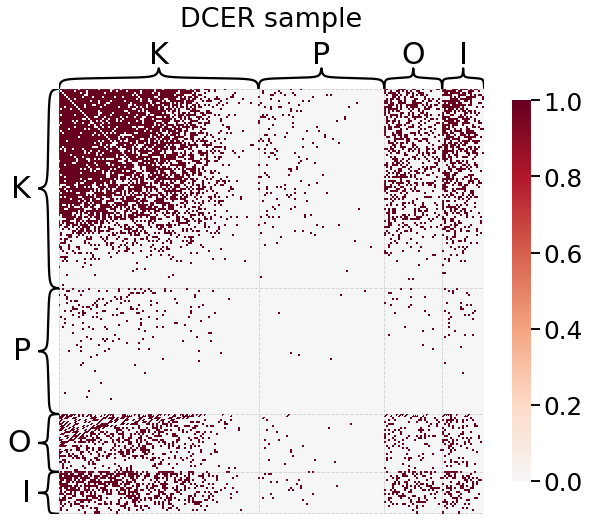

In [5]:
from graspy.models import DCEREstimator
dcer = DCEREstimator(directed=True,loops=False)
dcer.fit(adj)
print(f"DCER \"p\" parameter: {dcer.p_}")
heatmap(dcer.p_mat_,
        inner_hier_labels=labels,
        vmin=0,
        vmax=1,
        font_scale=1.5,
        title="DCER probability matrix",
        sort_nodes=True);
heatmap(dcer.sample()[0],
        inner_hier_labels=labels,
        font_scale=1.5,
        title="DCER sample",
        sort_nodes=True);

SBM "B" matrix:
[[0.         0.38333333 0.11986864 0.        ]
 [0.44571429 0.3584     0.49448276 0.        ]
 [0.09359606 0.         0.20095125 0.        ]
 [0.         0.07587302 0.         0.        ]]


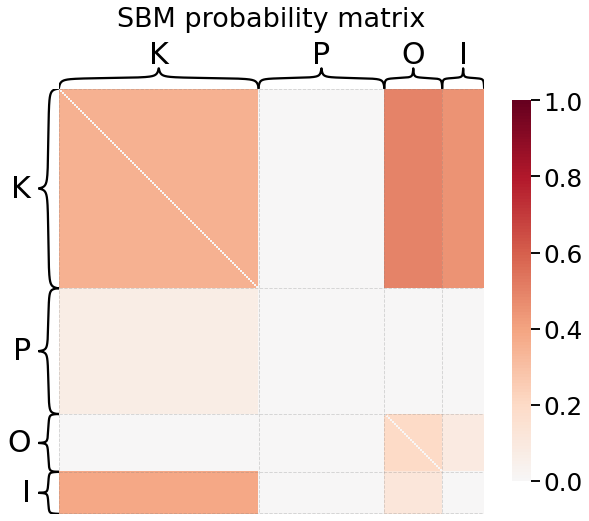

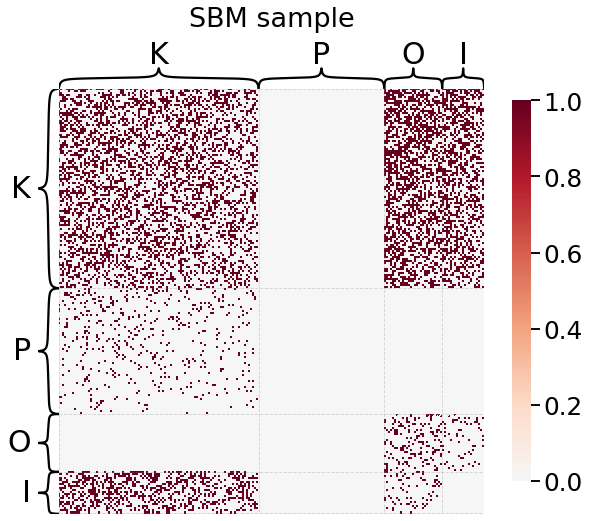

In [6]:
from graspy.models import SBMEstimator
sbme = SBMEstimator(directed=True,loops=False)
sbme.fit(adj, y=labels)
print("SBM \"B\" matrix:")
print(sbme.block_p_)
heatmap(sbme.p_mat_,
        inner_hier_labels=labels,
        vmin=0,
        vmax=1,
        font_scale=1.5,
        title="SBM probability matrix",
        sort_nodes=True)
heatmap(sbme.sample()[0],
        inner_hier_labels=labels,
        font_scale=1.5,
        title="SBM sample",
        sort_nodes=True);

DCSBM "B" matrix:
[[   0.  805.   73.    0.]
 [ 936. 3584. 1434.    0.]
 [  57.    0.  169.    0.]
 [   0.  478.    0.    0.]]


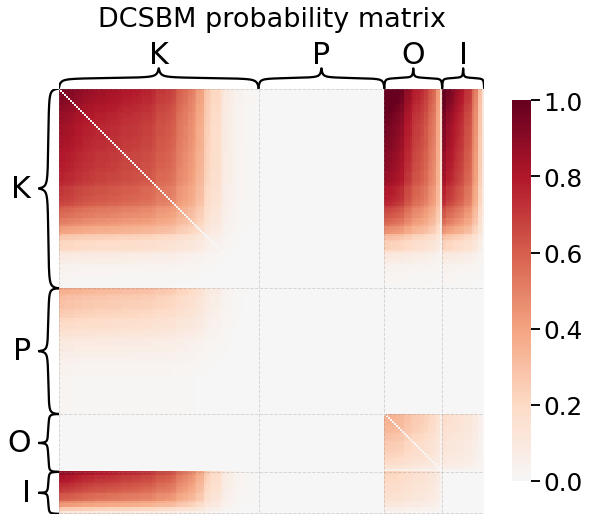

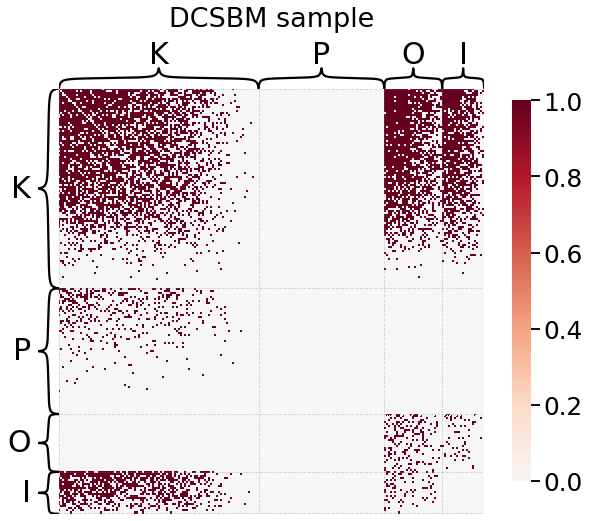

In [7]:
from graspy.models import DCSBMEstimator
dcsbme = DCSBMEstimator(directed=True,loops=False)
dcsbme.fit(adj, y=labels)
print("DCSBM \"B\" matrix:")
print(dcsbme.block_p_)
heatmap(dcsbme.p_mat_,
        inner_hier_labels=labels,
        font_scale=1.5,
        title="DCSBM probability matrix",
        vmin=0,
        vmax=1,
        sort_nodes=True)
heatmap(dcsbme.sample()[0],
        inner_hier_labels=labels,
        title="DCSBM sample",
        font_scale=1.5,
        sort_nodes=True);

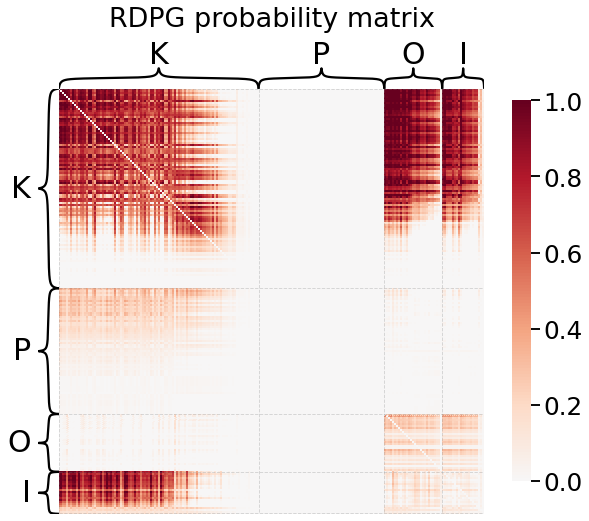

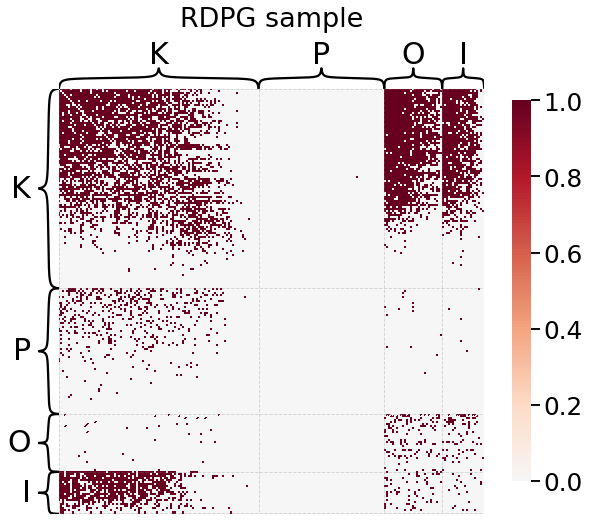

In [8]:
from graspy.models import RDPGEstimator
rdpge = RDPGEstimator(loops=False)
rdpge.fit(adj, y=labels)
heatmap(rdpge.p_mat_,
        inner_hier_labels=labels,
        vmin=0,
        vmax=1,
        font_scale=1.5,
        title="RDPG probability matrix",
        sort_nodes=True
       )
heatmap(rdpge.sample()[0],
        inner_hier_labels=labels,
        font_scale=1.5,
        title="RDPG sample",
        sort_nodes=True);

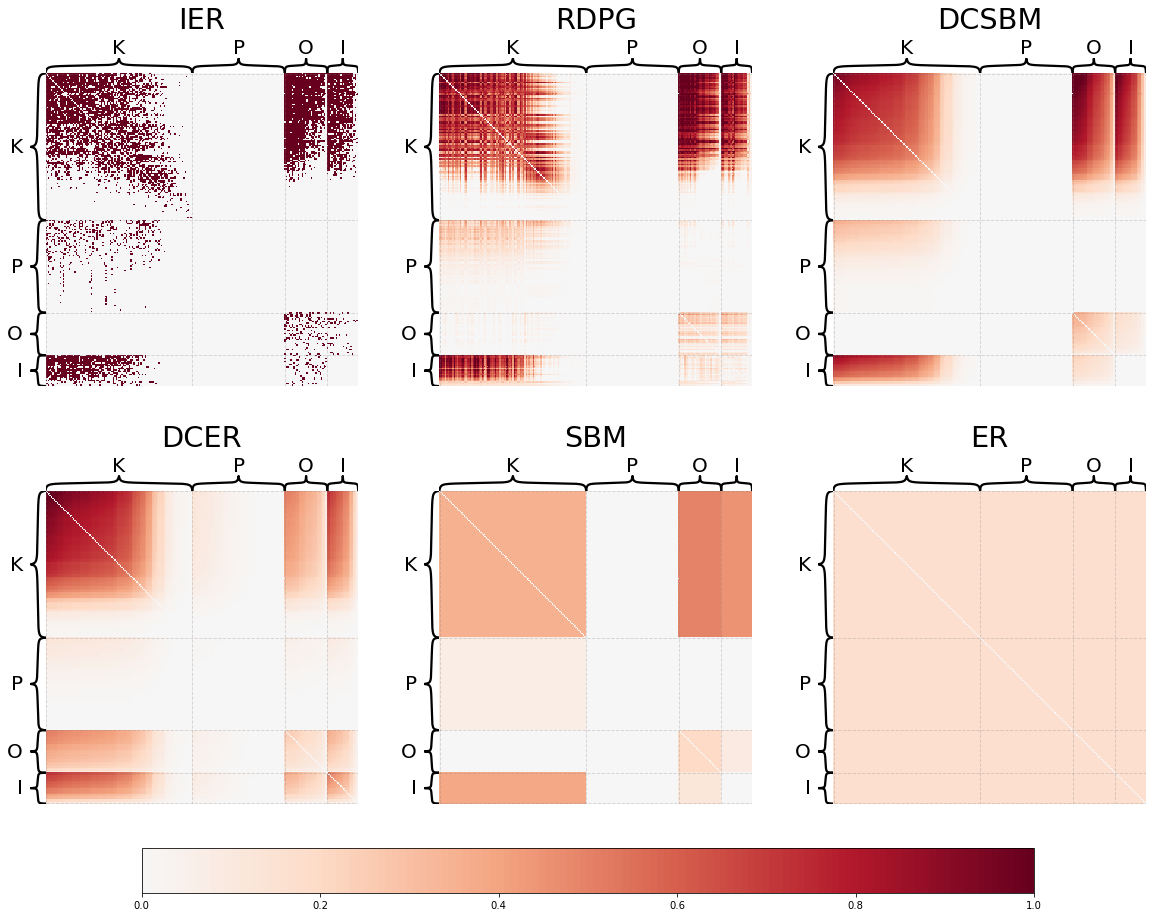

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

fig, axs = plt.subplots(2, 3, figsize=(20, 16))

# colormapping
cmap = cm.get_cmap("RdBu_r")

center = 0
vmin = 0
vmax = 1
norm = mpl.colors.Normalize(0, 1)
cc = np.linspace(0.5, 1, 256)
cmap = mpl.colors.ListedColormap(cmap(cc))

# heatmapping
heatmap_kws = dict(
    inner_hier_labels=labels,
    vmin=0,
    vmax=1,
    cbar=False,
    cmap=cmap,
    center=None,
    hier_label_fontsize=20,
    title_pad=45,
    font_scale=1.6,
    sort_nodes=True
)

models = [rdpge, dcsbme, dcer, sbme, er]
model_names = ["RDPG", "DCSBM","DCER", "SBM", "ER"]

heatmap(adj, ax=axs[0][0], title="IER", **heatmap_kws)
heatmap(models[0].p_mat_, ax=axs[0][1], title=model_names[0], **heatmap_kws)
heatmap(models[1].p_mat_, ax=axs[0][2], title=model_names[1], **heatmap_kws)
heatmap(models[2].p_mat_, ax=axs[1][0], title=model_names[2], **heatmap_kws)
heatmap(models[3].p_mat_, ax=axs[1][1], title=model_names[3], **heatmap_kws)
heatmap(models[4].p_mat_, ax=axs[1][2], title=model_names[4], **heatmap_kws)


# add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(dcsbme.p_mat_)
fig.colorbar(sm,
             ax=axs,
             orientation="horizontal",
             pad=0.04,
             shrink=0.8,
             fraction=0.08,
             drawedges=False)
